# Algunas funciones con pandas y una miradita a stocks de Apple

Hola chicos, espero les haya ido bien con Sofi, hoy vamos a usar pandas para jugar con acciones bursalites.

Para iniciar, si les faltan librerias, en el terminal las pueden bajar con los siguientes comandos en linux. Usar pip en vez de pip3 si se está en windows:

<code>pip3 install numpy
<code>pip3 install pandas
<code>pip3 install pandas_datareader
<code>pip3 install datetime
    


<code>read_sql()
read_csv()

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader.data import DataReader
import datetime as dt

más sobre datetime objects: https://docs.python.org/3/library/datetime.html

In [2]:
start = dt.date(2020, 1,1)
end = dt.date.today()

In [3]:
end

datetime.date(2021, 9, 16)

In [4]:
start

datetime.date(2020, 1, 1)

In [5]:
print(end-start)
print(np.busday_count(start,end))

624 days, 0:00:00
446


## Con DataReader puedo pedir datos de acciones en varias paginas.

doc: http://esocialtrader.com/downloading-stock-prices/

In [6]:
data = DataReader('AAPL', 'yahoo', start, end) #AAPL es apple, yahoo es yahoo.finance

In [32]:
data.tail(7)

,High,Low,Open,Close,Volume,Adj Close,Dif,signo,SignoString
Date,,,,,,,,,
2021-09-08,157.039993,153.979996,156.979996,155.110001,74420200.0,155.110001,-1.869995,False,Red
2021-09-09,156.110001,153.949997,155.490005,154.070007,57305700.0,154.070007,-1.419998,False,Red
2021-09-10,155.479996,148.699997,155.000000,148.970001,140646400.0,148.970001,-6.029999,False,Red
2021-09-13,151.419998,148.750000,150.630005,149.550003,102404300.0,149.550003,-1.080002,False,Red
2021-09-14,151.070007,146.910004,150.350006,148.119995,109296300.0,148.119995,-2.230011,False,Red
2021-09-15,149.440002,146.369995,148.559998,149.029999,83223400.0,149.029999,0.470001,True,Green
2021-09-16,148.968399,147.220993,148.440002,148.827194,50995436.0,148.827194,0.387192,True,Green


In [8]:
data.shape

(431, 6)

## Acediendo a los datos

### Para Series

In [9]:
close= data.Close #data.Close haría lo mismo
close#.head()

Date
2020-01-02     75.087502
2020-01-03     74.357498
2020-01-06     74.949997
2020-01-07     74.597504
2020-01-08     75.797501
                 ...    
2021-09-10    148.970001
2021-09-13    149.550003
2021-09-14    148.119995
2021-09-15    149.029999
2021-09-16    148.827194
Name: Close, Length: 431, dtype: float64

In [10]:
close['2020-09-30']

115.80999755859375

In [11]:
close.loc['2020-09-30']

115.80999755859375

In [12]:
close.iloc[0]

75.0875015258789

### Para DataFrame

In [13]:
data.iloc[0]#['High']

High         7.515000e+01
Low          7.379750e+01
Open         7.406000e+01
Close        7.508750e+01
Volume       1.354804e+08
Adj Close    7.409644e+01
Name: 2020-01-02 00:00:00, dtype: float64

In [14]:
data.loc['2020-01-02']#['High']

High         7.515000e+01
Low          7.379750e+01
Open         7.406000e+01
Close        7.508750e+01
Volume       1.354804e+08
Adj Close    7.409644e+01
Name: 2020-01-02 00:00:00, dtype: float64

In [15]:
list(data.index)[:5]

[Timestamp('2020-01-02 00:00:00'),
 Timestamp('2020-01-03 00:00:00'),
 Timestamp('2020-01-06 00:00:00'),
 Timestamp('2020-01-07 00:00:00'),
 Timestamp('2020-01-08 00:00:00')]

In [16]:
data.loc[dt.datetime(2020,1,2)]

High         7.515000e+01
Low          7.379750e+01
Open         7.406000e+01
Close        7.508750e+01
Volume       1.354804e+08
Adj Close    7.409644e+01
Name: 2020-01-02 00:00:00, dtype: float64

In [17]:
data.reset_index().Date

0     2020-01-02
1     2020-01-03
2     2020-01-06
3     2020-01-07
4     2020-01-08
         ...    
426   2021-09-10
427   2021-09-13
428   2021-09-14
429   2021-09-15
430   2021-09-16
Name: Date, Length: 431, dtype: datetime64[ns]

pasar de datetime o timestamp a string: https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.strftime.html

In [18]:
data.High.iloc[0:5]

Date
2020-01-02    75.150002
2020-01-03    75.144997
2020-01-06    74.989998
2020-01-07    75.224998
2020-01-08    76.110001
Name: High, dtype: float64

## Algunas funciones basicas

In [19]:
#data.Close-data.Open
data['Dif'] = data.Close-data.Open # Este sería el retorno de realizar un largo durante el día
data.head()                        # Tambien conocido como intraday return

,High,Low,Open,Close,Volume,Adj Close,Dif
Date,,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.096443,1.027504
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.376083,0.070000
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.960770,1.502495
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.612930,-0.362495
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.797081,1.507500


cosas como <, >, ==, se encuentran en https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ge.html

In [20]:
data['signo']= data['Dif'].gt(0) #ge, e, le, lt
data.head()

,High,Low,Open,Close,Volume,Adj Close,Dif,signo
Date,,,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.096443,1.027504,True
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.376083,0.070000,True
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.960770,1.502495,True
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.612930,-0.362495,False
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.797081,1.507500,True


In [21]:
sig={True:'Green',False:'Red'}
data['SignoString']=data.signo.map(sig)
data

,High,Low,Open,Close,Volume,Adj Close,Dif,signo,SignoString
Date,,,,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.096443,1.027504,True,Green
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.376083,0.070000,True,Green
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.960770,1.502495,True,Green
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.612930,-0.362495,False,Red
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.797081,1.507500,True,Green
...,...,...,...,...,...,...,...,...,...
2021-09-10,155.479996,148.699997,155.000000,148.970001,140646400.0,148.970001,-6.029999,False,Red
2021-09-13,151.419998,148.750000,150.630005,149.550003,102404300.0,149.550003,-1.080002,False,Red
2021-09-14,151.070007,146.910004,150.350006,148.119995,109296300.0,148.119995,-2.230011,False,Red


In [22]:
data.Dif.min()

-6.870002746582031

In [23]:
data.Dif.max()

5.540000915527344

In [24]:
data.signo.astype('int32').sum()

228

In [25]:
data.signo.sum()

228

In [26]:
data.Dif.mean()

0.05082825662918268

In [27]:
data.Dif.std()

1.8304093892671949

## plots de pandas

<AxesSubplot:xlabel='Date'>

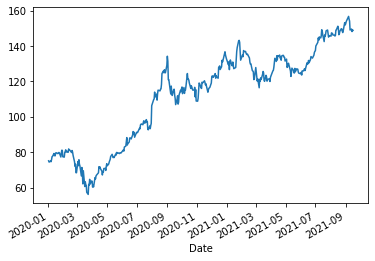

In [28]:
data.Close.plot()

<AxesSubplot:xlabel='Open', ylabel='Close'>

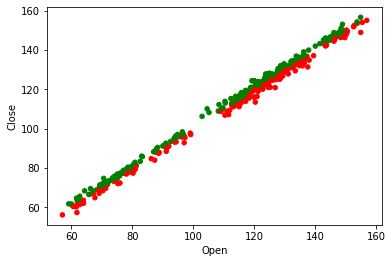

In [29]:
data.plot.scatter(x='Open',y='Close', c='SignoString')

In [30]:
data.corr()

,High,Low,Open,Close,Volume,Adj Close,Dif,signo
High,1.000000,0.998372,0.999084,0.998752,-0.524074,0.998706,-0.068011,-0.088260
Low,0.998372,1.000000,0.998594,0.998815,-0.559042,0.998850,-0.060010,-0.087690
Open,0.999084,0.998594,1.000000,0.997612,-0.537766,0.997590,-0.097689,-0.112857
Close,0.998752,0.998815,0.997612,1.000000,-0.543333,0.999976,-0.028718,-0.060366
Volume,-0.524074,-0.559042,-0.537766,-0.543333,1.000000,-0.544244,-0.046177,0.010373
Adj Close,0.998706,0.998850,0.997590,0.999976,-0.544244,1.000000,-0.028753,-0.060798
Dif,-0.068011,-0.060010,-0.097689,-0.028718,-0.046177,-0.028753,1.000000,0.763485
signo,-0.088260,-0.087690,-0.112857,-0.060366,0.010373,-0.060798,0.763485,1.000000


<AxesSubplot:ylabel='Density'>

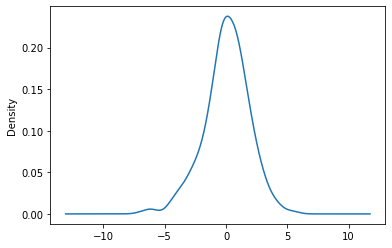

In [31]:
data.Dif.plot.kde()

## Groupby

In [77]:
sub=data.iloc[:50]
sub.tail()

,High,Low,Open,Close,Volume,Adj Close,Dif,signo,SignoString
Date,,,,,,,,,
2020-03-09,69.522499,65.750000,65.937500,66.542503,286744800.0,65.820076,0.605003,True,Green
2020-03-10,71.610001,67.342499,69.285004,71.334999,285290000.0,70.560547,2.049995,True,Green
2020-03-11,70.305000,67.964996,69.347504,68.857498,255598800.0,68.109940,-0.490005,False,Red
2020-03-12,67.500000,62.000000,63.985001,62.057499,418474000.0,61.383766,-1.927502,False,Red
2020-03-13,69.980003,63.237499,66.222504,69.492500,370732000.0,68.738045,3.269997,True,Green


In [79]:
sub.groupby('SignoString').mean()

,High,Low,Open,Close,Volume,Adj Close,Dif,signo
SignoString,,,,,,,,
Green,77.187845,74.951466,75.463880,76.726551,1.758817e+08,75.805240,1.262672,True
Red,77.758809,75.635238,77.092381,76.072143,1.792248e+08,75.150084,-1.020239,False


In [81]:
sub.groupby('SignoString').count().iloc[:,0]

SignoString
Green    29
Red      21
Name: High, dtype: int64

más info en https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html

### 1) ¿Como crear una columna con la diferencia entre el Close de un dia y el del anterior? 
### 2) ¿Como sacar el mayor precio entre el 1 de Julio y el 31 de diciembre del 2020, inclusivo?

In [82]:
data.head()

,High,Low,Open,Close,Volume,Adj Close,Dif,signo,SignoString
Date,,,,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.096443,1.027504,True,Green
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.376083,0.070000,True,Green
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.960770,1.502495,True,Green
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.612930,-0.362495,False,Red
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.797081,1.507500,True,Green


In [87]:
data= data.reset_index()
data['day2day']=0.0
for i in list(data.index)[1:]:
    data['day2day'].loc[i]= data['Close'].loc[i]-data['Close'].loc[i-1]
    
data

/home/usuario/.local/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Date,High,Low,Open,Close,Volume,Adj Close,Dif,signo,SignoString,day2day
0,2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.096443,1.027504,True,Green,0.000000
1,2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.376083,0.070000,True,Green,-0.730003
2,2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.960770,1.502495,True,Green,0.592499
3,2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.612930,-0.362495,False,Red,-0.352493
4,2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.797081,1.507500,True,Green,1.199997
...,...,...,...,...,...,...,...,...,...,...,...
426,2021-09-10,155.479996,148.699997,155.000000,148.970001,140646400.0,148.970001,-6.029999,False,Red,-5.100006
427,2021-09-13,151.419998,148.750000,150.630005,149.550003,102404300.0,149.550003,-1.080002,False,Red,0.580002
428,2021-09-14,151.070007,146.910004,150.350006,148.119995,109296300.0,148.119995,-2.230011,False,Red,-1.430008
429,2021-09-15,149.440002,146.369995,148.559998,149.029999,83223400.0,149.029999,0.470001,True,Green,0.910004


In [90]:
data['day2day']=data.Close.diff()
data

,Date,High,Low,Open,Close,Volume,Adj Close,Dif,signo,SignoString,day2day
0,2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.096443,1.027504,True,Green,NaN
1,2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.376083,0.070000,True,Green,-0.730003
2,2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.960770,1.502495,True,Green,0.592499
3,2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.612930,-0.362495,False,Red,-0.352493
4,2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.797081,1.507500,True,Green,1.199997
...,...,...,...,...,...,...,...,...,...,...,...
426,2021-09-10,155.479996,148.699997,155.000000,148.970001,140646400.0,148.970001,-6.029999,False,Red,-5.100006
427,2021-09-13,151.419998,148.750000,150.630005,149.550003,102404300.0,149.550003,-1.080002,False,Red,0.580002
428,2021-09-14,151.070007,146.910004,150.350006,148.119995,109296300.0,148.119995,-2.230011,False,Red,-1.430008
429,2021-09-15,149.440002,146.369995,148.559998,149.029999,83223400.0,149.029999,0.470001,True,Green,0.910004


%%time les saca la el tiempo en el que se corrió lo que hay en la selda. para más funciones de iphython magic ver: https://ipython.readthedocs.io/en/stable/interactive/magics.html

In [103]:
%%time
#list(data.Date)[125:253]
mayor=0
for i in list(data.index)[125:253]:
    if data.High.loc[i]>mayor: mayor= data.High.loc[i]

mayor

CPU times: user 4.8 ms, sys: 0 ns, total: 4.8 ms
Wall time: 4.78 ms


138.7899932861328

In [104]:
%%time
data.iloc[125:253].High.max()

CPU times: user 1.18 ms, sys: 0 ns, total: 1.18 ms
Wall time: 1.07 ms


138.7899932861328